In [2]:
from src.functions import *

In [3]:
plt.rcParams.update(
    {
        "xtick.direction": "in",
        "ytick.direction": "out",
        "ytick.right": False,
        "xtick.top": False,
        "ytick.left": True,
        "xtick.bottom": False,
        "figure.facecolor": "1",
        "savefig.facecolor": "1",
        "savefig.dpi": 600,
        "figure.dpi": 600,
        "savefig.bbox": "tight",
        "font.size": 7,
        "font.family": "serif",
        "lines.markersize": 4,
        "lines.linewidth": 1,
        'axes.axisbelow' : True
    }
)

# Panel (a)

In [4]:
grid_searches = {}
delta_quantum_arrays = {}

for n in range(4,10):
    grid_searches[n] = load_from_json(f'data/grid_search_n{n}.json')
    delta_quantum_arrays[n] = np.mean(grid_searches[n]['delta'], axis=2)

gamma_range = grid_searches[4]['gamma_range']
time_range = grid_searches[4]['time_range']
T = grid_searches[4]['T']
num_random_models = grid_searches[4]['num_random_models']

# Panel (b)

In [5]:
phase_diagrams = {}
q = {}
q_avg = {}

for n in range(4,10):
    phase_diagrams[n] = load_from_json(f'data/phase_diagram_n{n}.json')
    q[n] = phase_diagrams[n]['q']
    q_avg[n] = phase_diagrams[n]['q_avg']

gamma_range = phase_diagrams[7]['gamma_range']
T_range = phase_diagrams[7]['T_range']
num_random_models = phase_diagrams[7]['num_random_models']

# Panel (c)

In [6]:
methods = ['random', 'local', 'quantum', 'fixed_gamma', 'ra']

qubit_sweeps = {}
delta = {}
delta_avg = {}
delta_std = {}
fit = {}
k = {}
k_err = {}

for method in methods:
    qubit_sweeps[method] = load_from_json(f'data/qubit_sweep_{method}.json')

    delta[method] = qubit_sweeps[method]['delta']
    delta_avg[method] = qubit_sweeps[method]['delta_avg']
    delta_std[method] = qubit_sweeps[method]['delta_std']
    fit[method] = qubit_sweeps[method]['fit']
    k[method] = qubit_sweeps[method]['k']
    k_err[method] = qubit_sweeps[method]['k_err']

T = qubit_sweeps['random']['T']
qubits_range = qubit_sweeps['random']['qubits_range']
num_random_models = qubit_sweeps['random']['num_random_models']

colors = {'random': dark_grey,
          'local': blue,
          'quantum': red,
          'fixed_gamma': black,
          'ra': 'green'}

# Combined panel

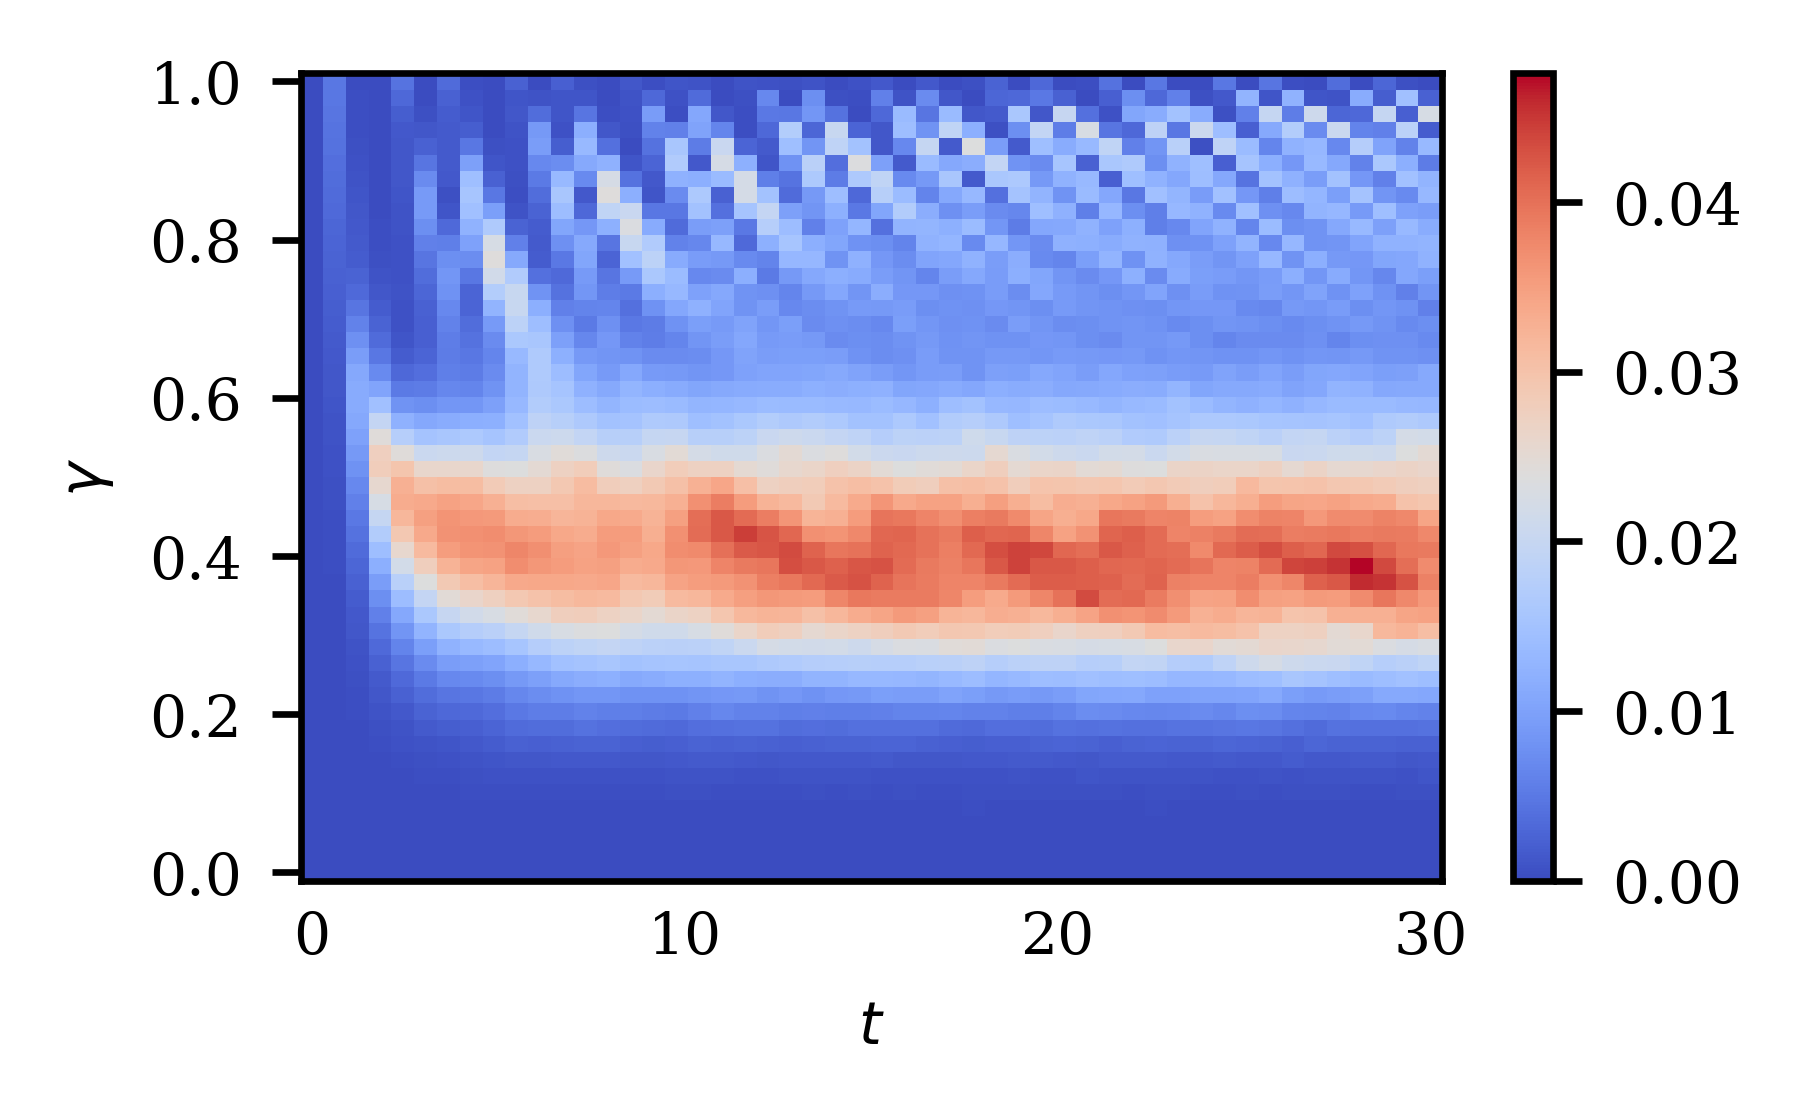

In [7]:
fig = plt.figure(figsize=(figure_size_x/2, figure_size_y/2))

# Plot data on each subplot

pc = plt.pcolor(time_range, 
                gamma_range,
                delta_quantum_arrays[9], 
                cmap='coolwarm',
                vmin=0,
                vmax=np.max(delta_quantum_arrays[9])
                # vmax=0.065,
                )

fig.colorbar(pc)


# Set labels
plt.xlabel('$t$')
plt.ylabel('$\gamma$')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

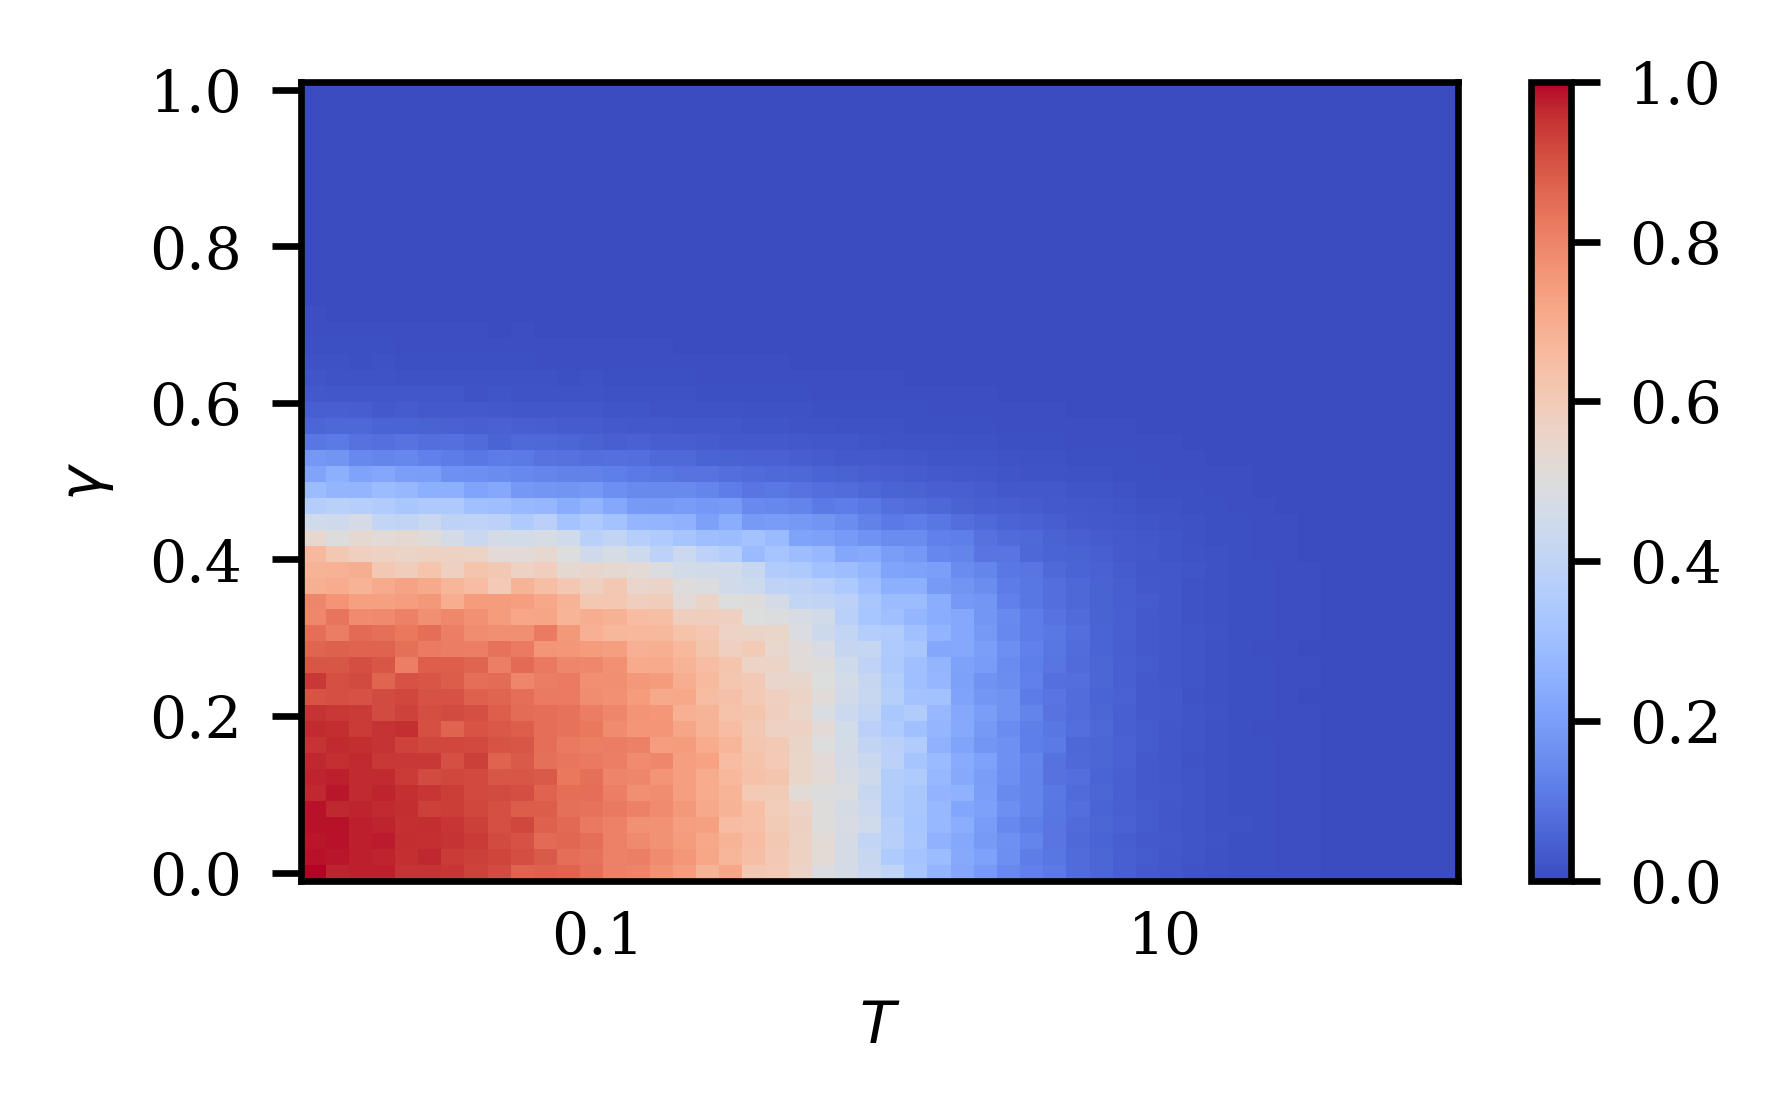

In [8]:
fig = plt.figure(figsize=(figure_size_x/2, figure_size_y/2))

# Plot data on each subplot

pc = plt.pcolor(T_range, 
                gamma_range,
                q_avg[9], 
                cmap='coolwarm',
                vmin=0,
                vmax=1
                )

fig.colorbar(pc)

plt.xscale('log')

# Set labels
plt.xlabel('$T$')
plt.ylabel('$\gamma$')

plt.xticks([0.1, 10], labels=[0.1, 10])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

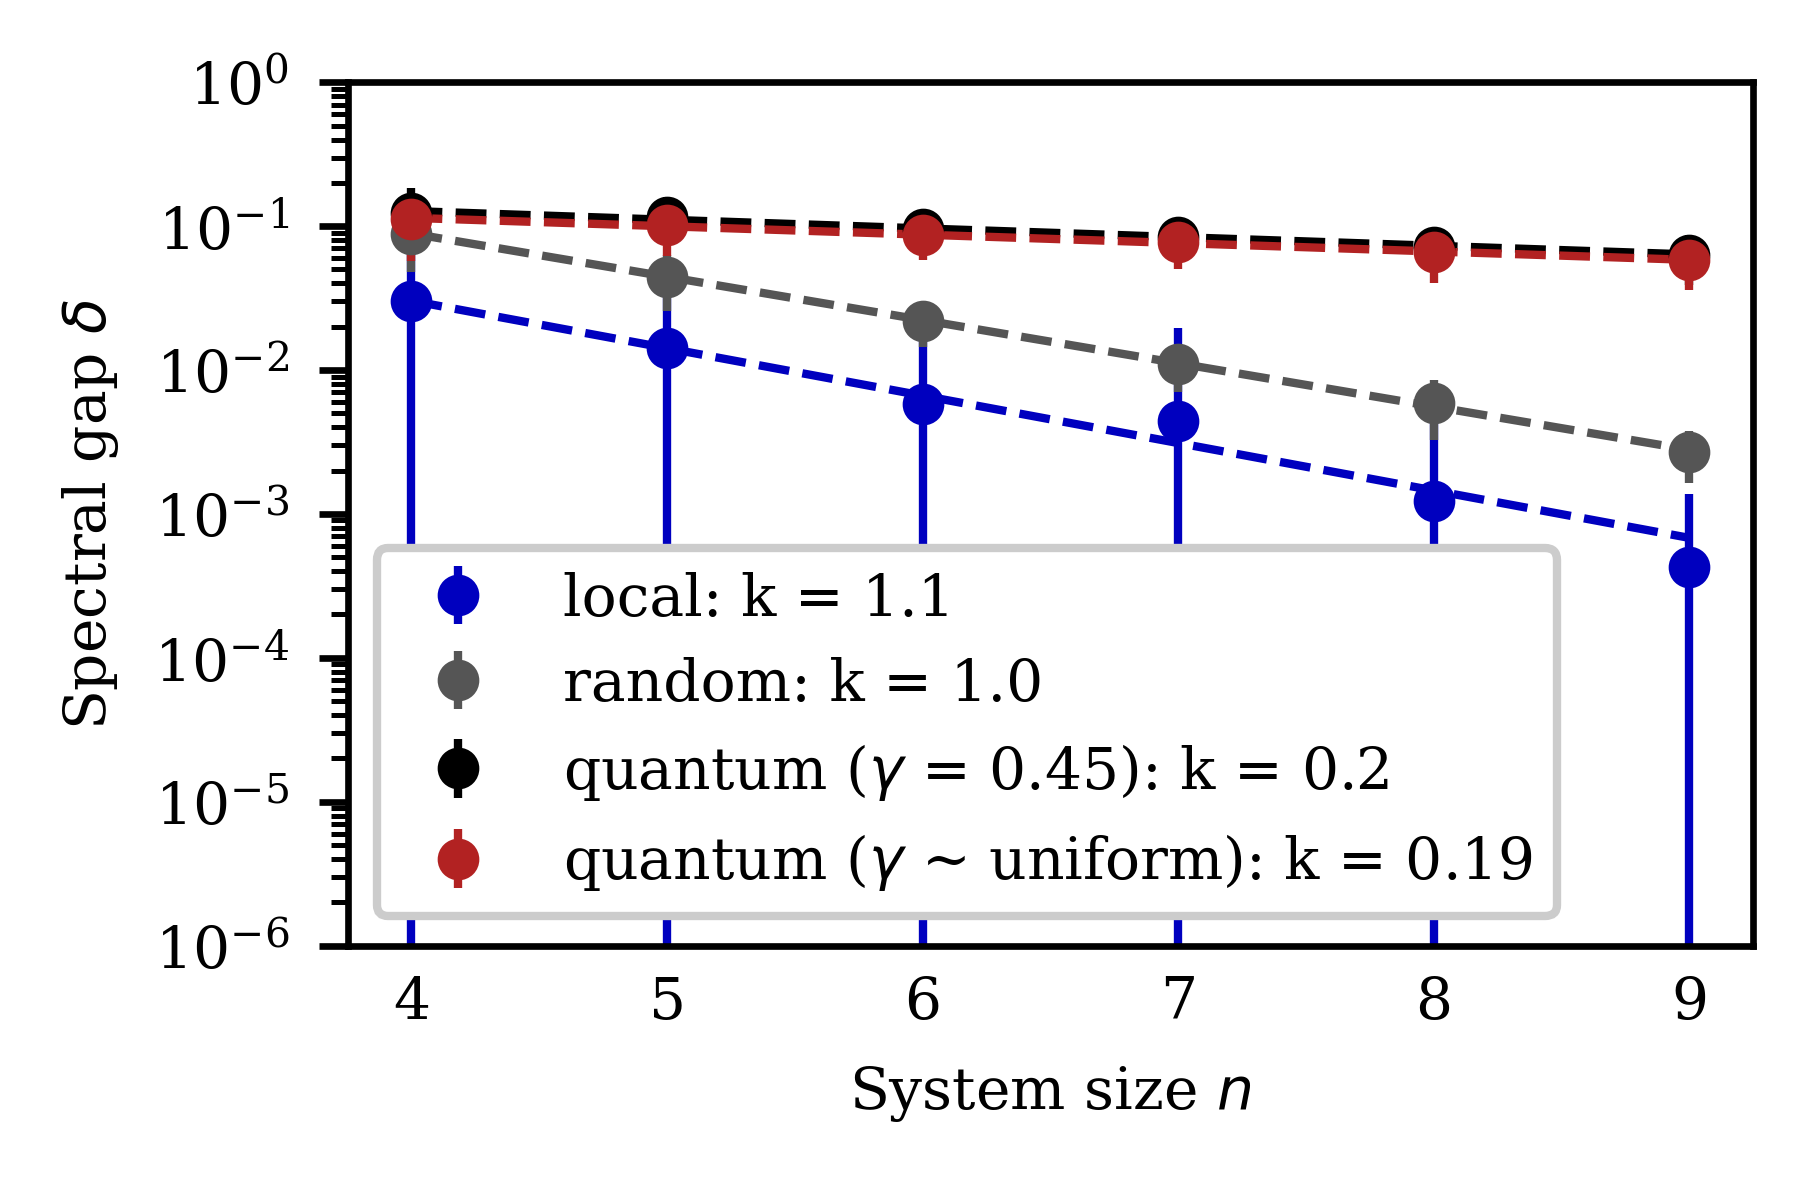

<Figure size 3840x2880 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(figure_size_x/2, figure_size_y/2))

labels = {'local' : 'local: ' + f'k = {np.around(k["local"],2)}',
          'random' : 'random: ' + f'k = {np.around(k["random"],2)}',
          'fixed_gamma' : 'quantum ($\gamma$ = 0.45): ' + f'k = {np.around(k["fixed_gamma"],2)}',
          'quantum' : 'quantum ($\gamma$ ~ uniform): ' + f'k = {np.around(k["quantum"],2)}'}

for method in ['local', 'random', 'fixed_gamma', 'quantum']:
    # Plot the data with error bars
    plt.errorbar(qubits_range, 
                 delta_avg[method], 
                 yerr=delta_std[method], 
                 fmt='o', 
                 color=colors[method], 
                 label=labels[method]
                 )
    # Plot the fits
    plt.plot(qubits_range, fit[method], '--', color=colors[method])

plt.yscale('log')
plt.ylim([0.000001, 1])

# Customize the plot
plt.xlabel('System size $n$')
plt.ylabel('Spectral gap $\delta$')

legend = plt.legend()
legend.get_frame().set_alpha(1)

plt.show()
plt.tight_layout()

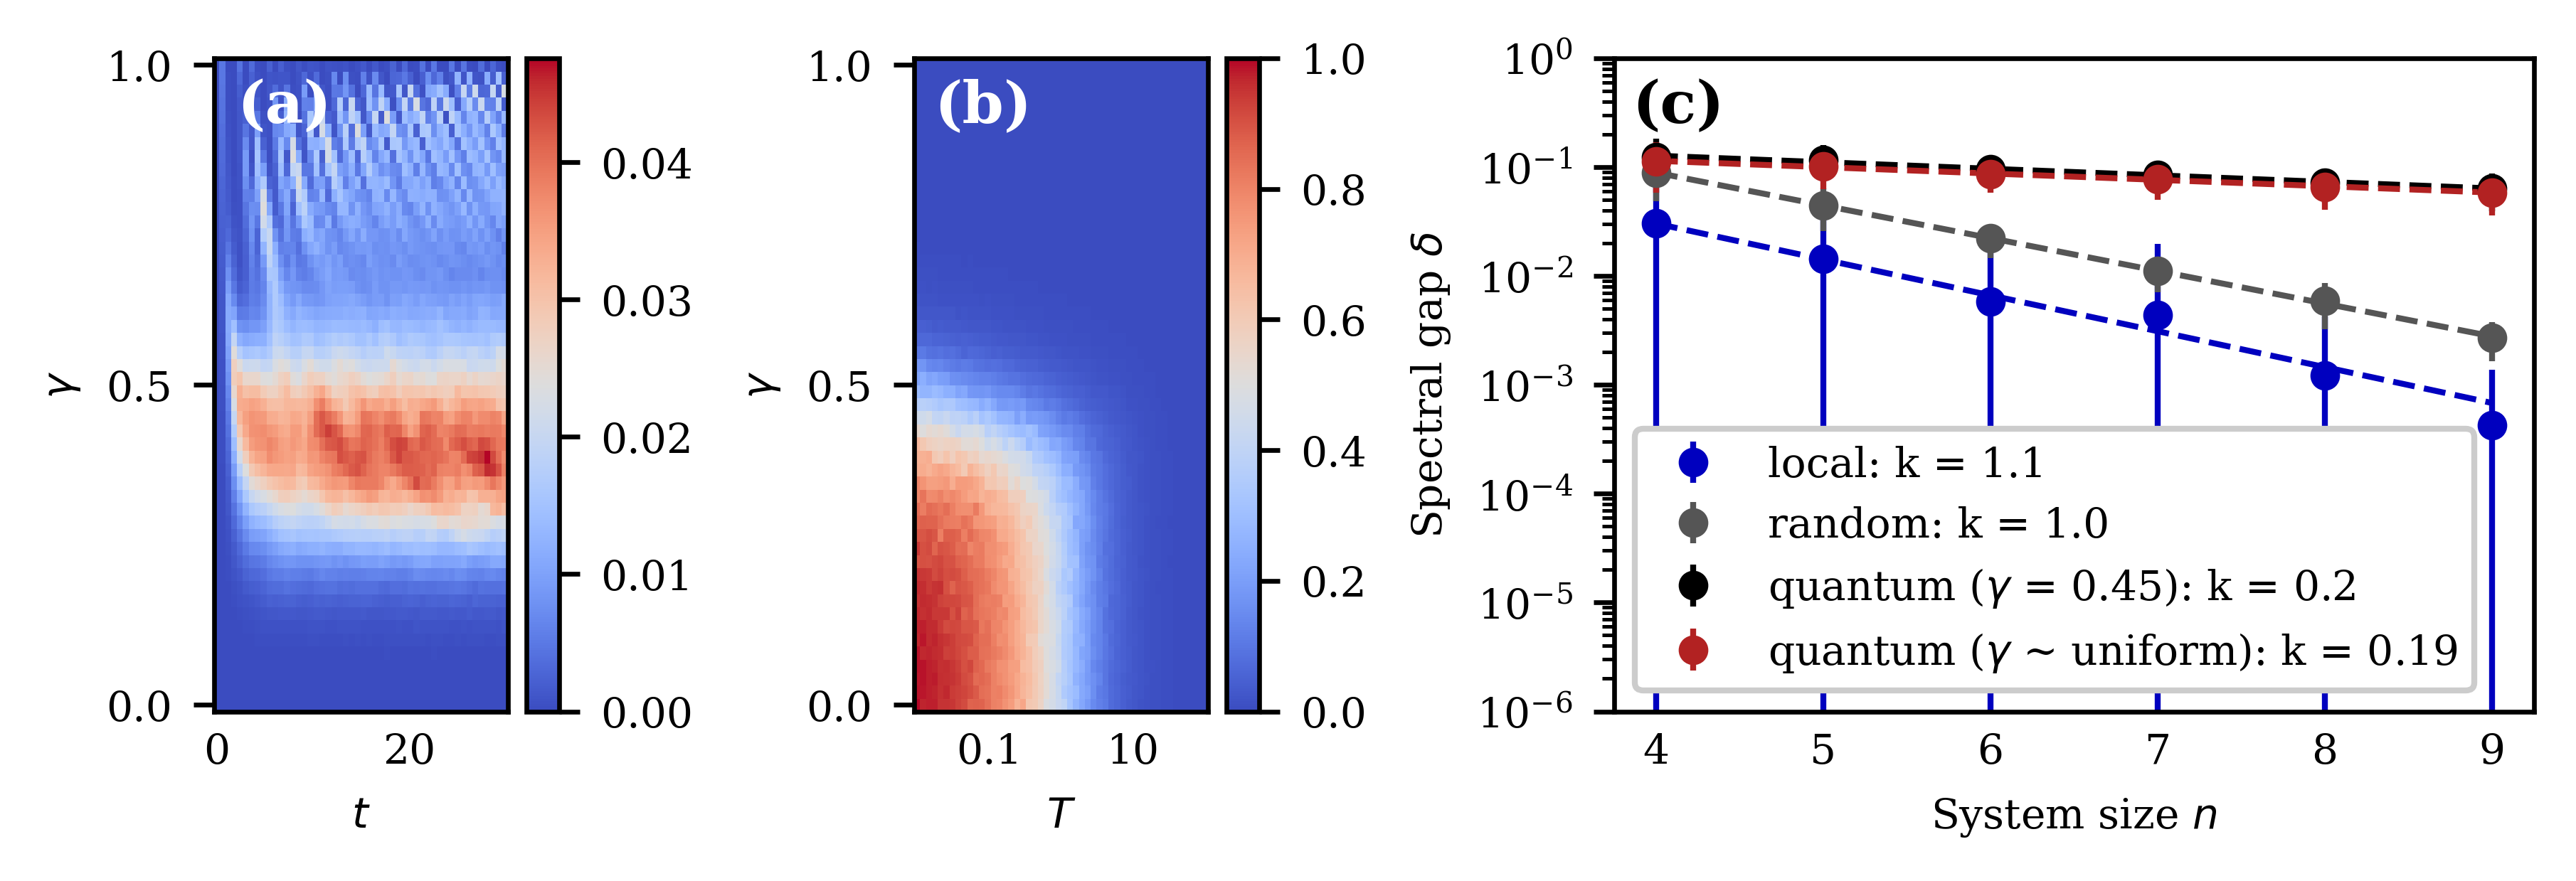

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(figure_size_x, figure_size_y/1.8),
                               gridspec_kw={'width_ratios': [1, 1, 2.5]})  # 1 row, 3 columns for the panels

# ---- Figure (a) ----
ax = axes[0]
pc = ax.pcolor(time_range, 
               gamma_range, 
               delta_quantum_arrays[9], 
               cmap='coolwarm', 
               vmin=0, 
               vmax=np.max(delta_quantum_arrays[9]))
fig.colorbar(pc, ax=ax)

# Set labels
ax.set_xlabel('$t$')
ax.set_ylabel('$\gamma$')
ax.set_yticks([0,0.5,1])

# Add label (a)
ax.text(0.4, 0.97, '(a)', transform=ax.transAxes, fontsize=10, fontweight='bold', va='top', ha='right', color='white')

# ---- Figure (b) ----
ax = axes[1]
pc = ax.pcolor(T_range, 
               gamma_range, 
               q_avg[9], 
               cmap='coolwarm', 
               vmin=0, 
               vmax=1)
fig.colorbar(pc, ax=ax)

# Log scale for x-axis
ax.set_xscale('log')

# Set labels and ticks
ax.set_xlabel('$T$')
ax.set_ylabel('$\gamma$')
ax.set_xticks([0.1, 10])
ax.set_xticklabels([0.1, 10])
ax.set_yticks([0,0.5,1])

# Add label (b)
ax.text(0.4, 0.97, '(b)', transform=ax.transAxes, fontsize=10, fontweight='bold', va='top', ha='right', color='white')


# ---- Figure (c) ----
ax = axes[2]

# Define the labels
labels = {'local': f'local: k = {np.around(k["local"], 2)}',
          'random': f'random: k = {np.around(k["random"], 2)}',
          'fixed_gamma': f'quantum ($\\gamma$ = 0.45): k = {np.around(k["fixed_gamma"], 2)}',
          'quantum': f'quantum ($\\gamma$ ~ uniform): k = {np.around(k["quantum"], 2)}'}

# Plot the data for each method
for method in ['local', 'random', 'fixed_gamma', 'quantum']:
    ax.errorbar(qubits_range, 
                delta_avg[method], 
                yerr=delta_std[method], 
                fmt='o', 
                color=colors[method], 
                label=labels[method])
    ax.plot(qubits_range, fit[method], '--', color=colors[method])

# Set scale, limits, and labels
ax.set_yscale('log')
ax.set_ylim([0.000001, 1])
ax.set_xlabel('System size $n$')
ax.set_ylabel('Spectral gap $\\delta$')

# Add legend
legend = ax.legend()
legend.get_frame().set_alpha(1)

# Add label (c)
ax.text(0.12, 0.97, '(c)', transform=ax.transAxes, fontsize=10, fontweight='bold', va='top', ha='right')


# ---- Adjust the layout ----
plt.tight_layout()

# ---- Show the full figure with all three panels ----
plt.show()

fig.savefig(local_path+f'figures/grid_and_phase')